In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Análise Univariada


In [ ]:
# Carregar data frame
df = pd.read_csv("/content/CHURN_CREDIT_MOD14_cleaned.csv", delimiter=',')

df.head(10)

,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,677,SPAIN,Male,18.0,5,134796.87,2,1.0,0.0,1011688.0,0
1,644,SPAIN,Female,18.0,7,0.00,1,0.0,1.0,1011688.0,0
2,641,SPAIN,Male,18.0,1,0.00,2,0.0,1.0,1011688.0,0
3,826,SPAIN,Male,18.0,2,0.00,2,0.0,1.0,1011688.0,0
4,774,SPAIN,Female,18.0,1,185891.54,1,1.0,0.0,1011688.0,0
5,688,SPAIN,Female,18.0,2,0.00,2,1.0,0.0,1011688.0,0
6,803,SPAIN,Male,18.0,6,0.00,1,0.0,0.0,1011688.0,1
7,578,SPAIN,Female,18.0,8,71843.15,2,0.0,1.0,1011688.0,0
8,598,SPAIN,Male,18.0,6,0.00,2,0.0,1.0,1011688.0,0
9,624,SPAIN,Female,18.0,6,0.00,2,0.0,1.0,1011688.0,0


In [ ]:
# Verificando tipos de dados
df.dtypes

,0
Credit_Score,int64
Pais,object
Genero,object
Idade,float64
Tempo_Credito,int64
Balanco,float64
Qtd_Produtos,int64
Possui_Cartao,float64
Membro_Ativo,float64
Salario_Anual,float64


In [ ]:
# Verificando valores nulos
df.isnull().sum()

,0
Credit_Score,0
Pais,0
Genero,0
Idade,193
Tempo_Credito,0
Balanco,0
Qtd_Produtos,0
Possui_Cartao,0
Membro_Ativo,0
Salario_Anual,0


**Passo 1:**
Estatísticas Descritivas: Calcule estatísticas descritivas básicas para resumir a distribuição da variável, como média, mediana, moda, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# A função describe é uma excelente função para dar um panorama das nossas variáveis QUANTITATIVAS (numéricas), ela dá uma visão geral
df.describe()

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
count,99901.000000,99708.000000,99901.000000,99901.000000,99901.000000,99901.000000,99901.000000,9.990100e+04,99901.000000
mean,656.495060,38.144095,5.027838,55552.728848,1.553968,0.755378,0.497493,4.208816e+06,0.211169
std,80.286609,8.818943,2.806926,62784.678193,0.547634,0.429865,0.499996,5.528322e+06,0.408140
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.158000e+03,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.011688e+06,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,1.011688e+06,0.000000
75%,710.000000,42.000000,7.000000,119852.010000,2.000000,1.000000,1.000000,6.401424e+06,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,3.819017e+07,1.000000


**Passo 2:**

Aprofundamento nas variáveis com comportamento "estranho".

In [ ]:
#verificando quantidade de linhas com o dado igual a 0 (relembrando que aula passada notamos que de fato essa variavel não tinha to)
(df['Balanco'] == 0).sum()

np.int64(54173)

In [ ]:
(df['Balanco'] == 0).mean() * 100

np.float64(54.2266844175734)

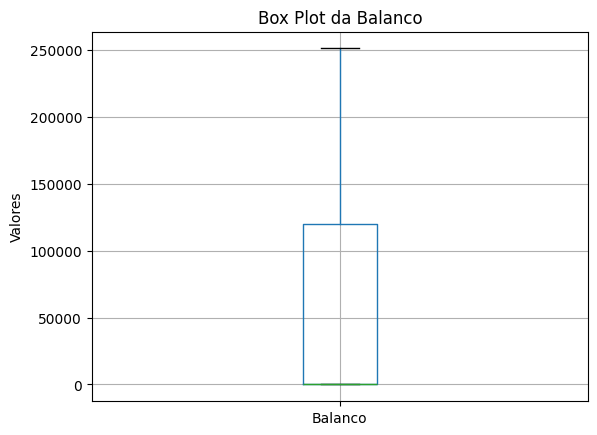

In [ ]:
df.boxplot(column='Balanco')
plt.title('Box Plot da Balanco')
plt.ylabel('Valores')
plt.show()

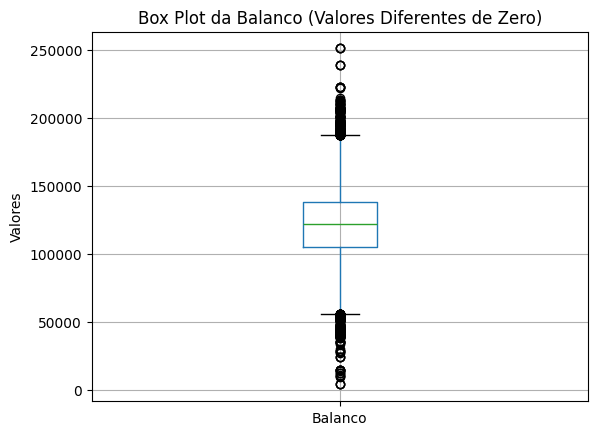

In [ ]:
# Nesse trecho do nosso código iremos selecionar os valores da coluna balanco que são diferentes de 0

df_nao_zero = df[df['Balanco'] != 0]
df_nao_zero.boxplot(column='Balanco')
plt.title('Box Plot da Balanco (Valores Diferentes de Zero)')
plt.ylabel('Valores')
plt.show()

# Notamos que temos forte presença de valores fora da normalidade dos dados, apesar desses dados a distribuição dos demais dados é bem equilibrada.

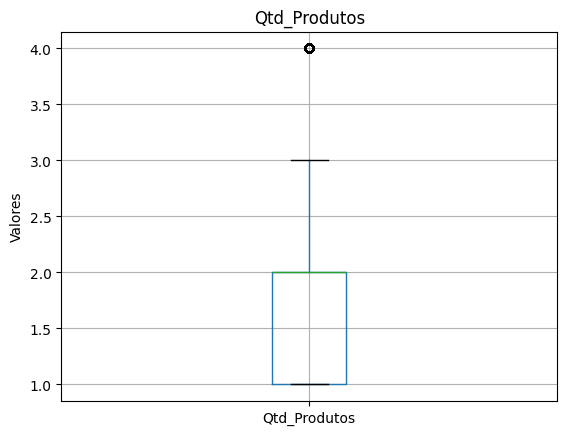

In [ ]:
df.boxplot(column='Qtd_Produtos')
plt.title('Qtd_Produtos')
plt.ylabel('Valores')
plt.show()

#Notem que a distribuição é pouco proporcional, muitos valores abaixo de 1.5 e outliers acima de 3.0

Vamos comparar com o boxplot de uma variável que parece estar melhor distribuida:

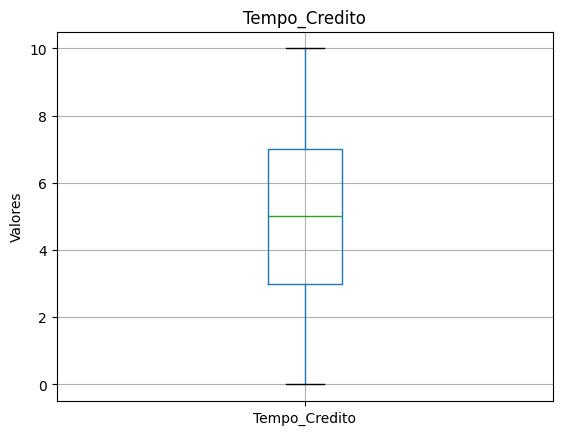

In [ ]:
df.boxplot(column='Tempo_Credito')
plt.title('Tempo_Credito')
plt.ylabel('Valores')
plt.show()
# Notem como o boxplot tem um comportamento esperado, existe proporcionalidade entre a distribuição dos dados, sem presença de outliers.

**Passo 3:**

Analisando as variáveis booleanas.

É muito importante verificarmos a distribuição das variáveis com valores booleanos (1 e 0), saber se as distribuições são balanceadas e se alguma categoria acaba tendo baixa relevância.

Text(0, 0.5, 'Frequência')

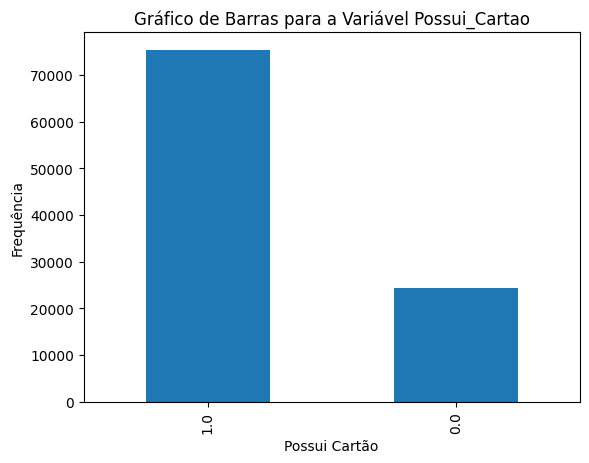

In [ ]:
# Contagem dos valores da coluna de possui_cartao
contagem_cartao = df['Possui_Cartao'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_cartao = (contagem_cartao / contagem_cartao.sum()) * 100
ax = contagem_cartao.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Possui_Cartao')
plt.xlabel('Possui Cartão')
plt.ylabel('Frequência')

In [ ]:
# Contando as ocorrências
contagem_cartao = df['Possui_Cartao'].value_counts()

# Calculando a porcentagem
(contagem_cartao / contagem_cartao.sum()) * 100

,count
Possui_Cartao,
1.0,75.537782
0.0,24.462218


Text(0, 0.5, 'Frequência')

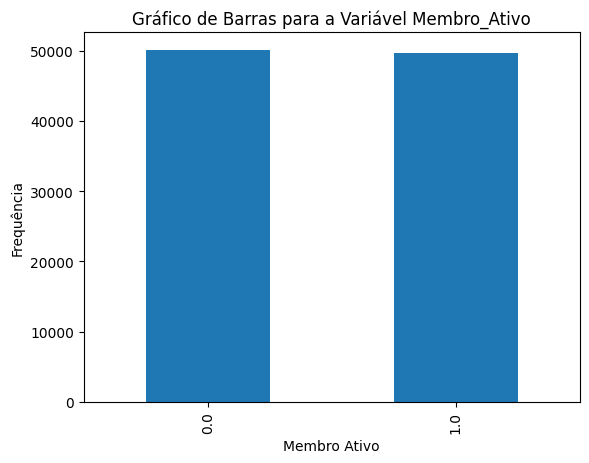

In [ ]:
#Membro_Ativo
contagem_membro = df['Membro_Ativo'].value_counts()

porcentagem_membro = (contagem_membro / contagem_membro.sum()) * 100
ax = contagem_membro.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Membro_Ativo')
plt.xlabel('Membro Ativo')
plt.ylabel('Frequência')

# Notamos que para a variável de possui cartão a grande maioria dos nossos clientes possui esse produto (cerca de 75% da nossa base).

In [ ]:
contagem_membro = df['Membro_Ativo'].value_counts()
(contagem_membro / contagem_membro.sum()) * 100

# Já na variável de membro ativo notamos um balanceamento entre as duas classes.
# É bem interessante pois apesar de ambas serem variáveis booleanas afetaram nossos modelos de forma diferente.

,count
Membro_Ativo,
0.0,50.250748
1.0,49.749252


* **Classe majoritária:** Quando temos o primeiro caso em que existe uma classe majoritária, ou seja nosso modelo pode tendenciar mais em direção a essa classe.

* **Classes balanceadas:** no caso de variáveis balanceadas elas são geralmente mais interessantes para o aprendizado do modelo pois o modelo pode aprender com maior facilidade a relação dessas classes com o Churn (variável que tentaremos prever).

Text(0, 0.5, 'Frequência')

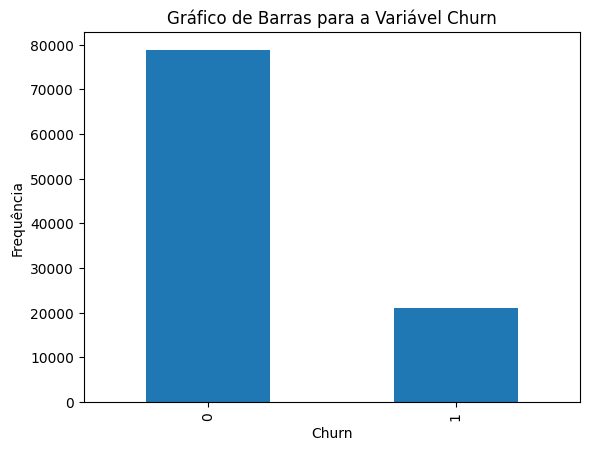

In [ ]:
contagem_churn = df['Churn'].value_counts()

porcentagem_churn = (contagem_churn / contagem_churn.sum()) * 100
ax = contagem_churn.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Churn')
plt.xlabel('Churn')
plt.ylabel('Frequência')

Nós identificamos então que a variável principal também tem um desbalanceamento. Esse ponto é muito importante e no módulo Balanceamento, Variáveis Categóricas - A Terceira etapa Pré Modelagem aprenderemos como trabalhar com esses casos e obter o melhor resultado possível. Nessa etapa apenas estamos identificando.

**Passo 4:**

Analisando as variáveis categóricas.

Também necessitamos verificar de forma individualmente qual o comportamento da distribuição das variáveis categóricas.

/tmp/ipython-input-2699513189.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


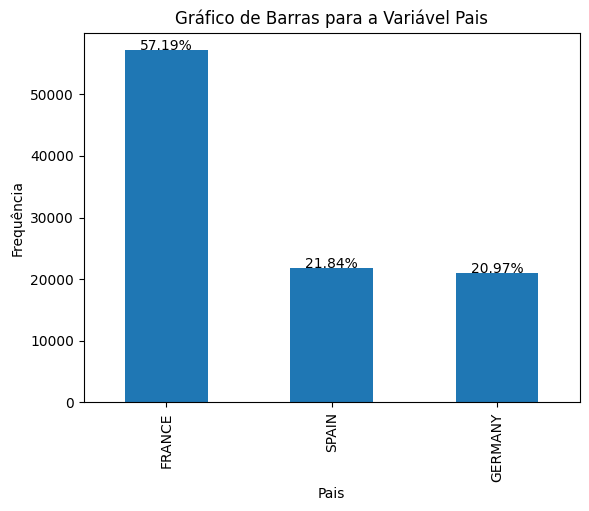

In [ ]:
# Calculando as porcentagens
contagem = df['Pais'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100


ax = contagem.plot(kind='bar')

# Adicionando pora procentagem nas barras
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Pais')
plt.xlabel('Pais')
plt.ylabel('Frequência')

plt.show()

# É possível identificarmos que a maioria dos nossos clientes estão cituados na França.
# Nenhuma das variáveis tem uma % muito baixa, o que seria preocupante para previsão.

/tmp/ipython-input-3660445229.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')


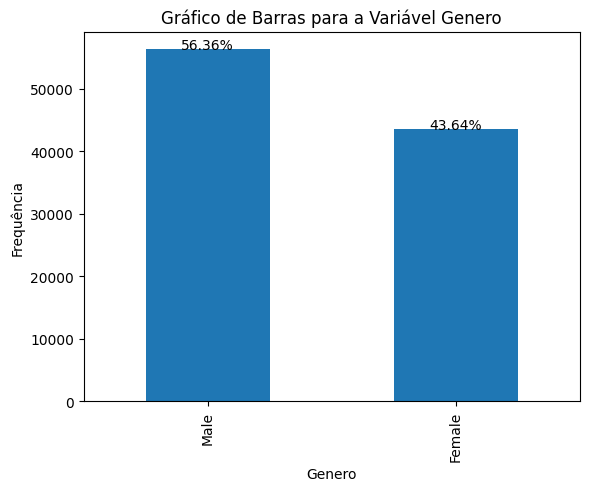

In [ ]:
contagem = df['Genero'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Genero')
plt.xlabel('Genero')
plt.ylabel('Frequência')

plt.show()
# A questão de genero é bem equilibrada, temos clientes homens e mulheres.

Vamos pontuar os principais insights que retiramos dessa primeira análise univariada:

* Tanto a variável balanco quanto Qtd_Produtos possuem muitos outliers.

* A grande maioria dos nossos clientes possui cartão de crédito.

* Temos uma quantidade muito parecida de membros ativos e não ativos.

* A maioria dos nossos clientes está cituado na França.

* A proporção de mulheres e homens é bem semelhante.